In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
pd.set_option('display.max_columns', None)
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200

import statsmodels.api as sm


In [2]:
pat = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/patient_df.csv')

In [3]:
pat.columns

Index(['Unnamed: 0', 'Patient_ID', 'Online_Follower', 'LinkedIn_Shared',
       'Twitter_Shared', 'Facebook_Shared', 'Income', 'Education_Score', 'Age',
       'First_Interaction', 'City_Type', 'Employer_Category', 'Job_Type'],
      dtype='object')

In [55]:
xg = pd.read_csv('/home/allen/Galva/capstones/capstone2/src/explore/testing/x2.csv')

In [56]:
xg.columns

Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5',
       'Camp Start Date - Registration Date',
       'Registration Date - First Interaction',
       'Camp Start Date - First Interaction',
       'Camp End Date - Registration Date', 'Camp Length', 'Second', 'Third',
       'A', 'C', 'D', 'E', 'F', 'G', '2100', '2.0', '3.0', '4.0', '5.0', '6.0',
       '7.0', '8.0', '9.0', '10.0', '11.0', '12.0', '13.0', '14.0', '9999.0',
       '1', '2', '3', '4', '1036', '1216', '1217', '1352', '1704', '1729',
       '2517', '2662', '23384', 'prediction', 'Proba', 'y_target'],
      dtype='object')

In [2]:
#sns.heatmap(df_withID.isna())

In [22]:
fu = df_withID['Job Type_x'].values

dict_items([('9999', 60075), ('Others', 2239), ('Technology', 3533), ('Consulting', 2128), ('Software Industry', 2358), ('Manufacturing', 510), ('Education', 1125), ('Health', 446), ('Retail', 535), ('BFSI', 845), ('Transport', 364), ('Broadcasting', 185), ('Telecom', 272), ('Real Estate', 361), ('Food', 302)])


In [4]:
df_withID['Tups'] = list(zip(df_withID.City_Type2_x,df_withID.Health_Camp_ID))

In [5]:
df_withID['Tups2'] = list(zip(df_withID['Camp Length'].values,df_withID.Health_Camp_ID))

In [6]:
d2={}
for i in df_withID['Tups2'].values:
    key = i[1]
    value = i[0]
    if key not in d2.keys():
        d2[key]=value

In [7]:
d2_counts={}
for i in d2.values():
    if i not in d2_counts:
        d2_counts[i]=1
    else:
        d2_counts[i]+=1
print(sorted(d2_counts.items()))

[(2, 1), (3, 5), (4, 4), (5, 5), (7, 1), (8, 3), (12, 2), (13, 2), (15, 1), (17, 2), (18, 1), (39, 1), (48, 1), (58, 1), (59, 1), (73, 1), (74, 1), (177, 1), (185, 2), (189, 2), (190, 1), (205, 1), (392, 1), (751, 1), (771, 2)]


In [15]:
cat2={}
city={}
jobs={}

for i in df_withID['City_Type2_x'].values:
    if i not in city:
        city[i]=1
    else:
        city[i]+=1

for ii in df_withID['Category 2'].values:
    if ii not in cat2:
        cat2[ii]=1
    else:
        cat2[ii]+=1
for iii in df_withID['Job Type_x'].values:
    if iii not in jobs:
        jobs[iii]=1
    else:
        jobs[iii]+=1
        
print(cat2.values(), '*******cat2')
print(city.values(), 'CITY')
print(jobs.values(), 'JOBs')

dict_values([10272, 24660, 20988, 10993, 4121, 2426, 1818]) *******cat2
dict_values([33208, 4259, 3312, 5451, 8273, 3441, 4025, 4360, 6139, 2810]) CITY
dict_values([60075, 2239, 3533, 2128, 2358, 510, 1125, 446, 535, 845, 364, 185, 272, 361, 302]) JOBs


In [4]:
#still might need to check on which patients are in dff but missing from the 37633 Unique patient IDs
dff = pd.read_csv('/home/allen/Galva/capstones/capstone2/data/model_agent.csv')
a = pd.read_csv('/home/allen/Galva/capstones/capstone2/src/explore/temp_csv/thomps2.csv') 

In [5]:
# dff['Prediction_Score'] = dff['prediction_kNN']+dff['prediction_sVC']+dff['prediction_xg']+dff['y_target']
# dff['Prediction_Score2'] = dff['Prediction_Score'].astype(str) 
dff.columns

Index(['Unnamed: 0', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5',
       'Camp Start Date - Registration Date',
       'Registration Date - First Interaction',
       'Camp Start Date - First Interaction',
       'Camp End Date - Registration Date', 'Camp Length', 'Second', 'Third',
       'A', 'C', 'D', 'E', 'F', 'G', '2100', '2.0', '3.0', '4.0', '5.0', '6.0',
       '7.0', '8.0', '9.0', '10.0', '11.0', '12.0', '13.0', '14.0', '9999.0',
       '1', '2', '3', '4', '1036', '1216', '1217', '1352', '1704', '1729',
       '2517', '2662', '23384', 'Patient_ID', 'prediction', 'Proba',
       'y_target', 'proba_kNN', 'prediction_kNN', 'proba_sVC',
       'prediction_sVC', 'proba_xg', 'prediction_xg', 'Y_count_allModels',
       'Y_target_SUM'],
      dtype='object')

In [34]:
'''
Best way to be specific about success or failure for each test?
-Each model predicts 0/1 for each person who is either 0/1 == 4 system states per test
-For each person, each tetst == SXK, sXk, Skx, sKX, skX, etc 
'''

'\nBest way to be specific about success or failure for each test?\n-Each model predicts 0/1 for each person who is either 0/1 == 4 system states per test\n-For each person, each tetst == SXK, sXk, Skx, sKX, skX, etc \n\n'

In [6]:
dff.describe()
dff['Success'] = dff['Y_target_SUM'].apply(lambda x:4 if x == 0 else x) 

-It seems like I should change the nature of Y_count_allModels and Y-Target_SUM 
*** Rational would be that I don't Only care about Y-Target I  also care about Model Success

-So The update should be :

create 'Success_count' 


%% Can you stack lambda functions? - Like create a series of them

%%Note to self and use in interview - realized my model was incomplete in a certain sense | Success was attendance, success for me/models was correct predction.


In [54]:
# g = sns.relplot(data=dff, x='proba_xg', y='proba_s2',hue= 'y_target', palette="deep", kind='scatter', col="prediction_k2", col_wrap=2)
# plt.legend(loc='best')
# plt.title('S2 vs XG Probas')

<AxesSubplot:xlabel='Y_target_SUM', ylabel='proba_sVC'>

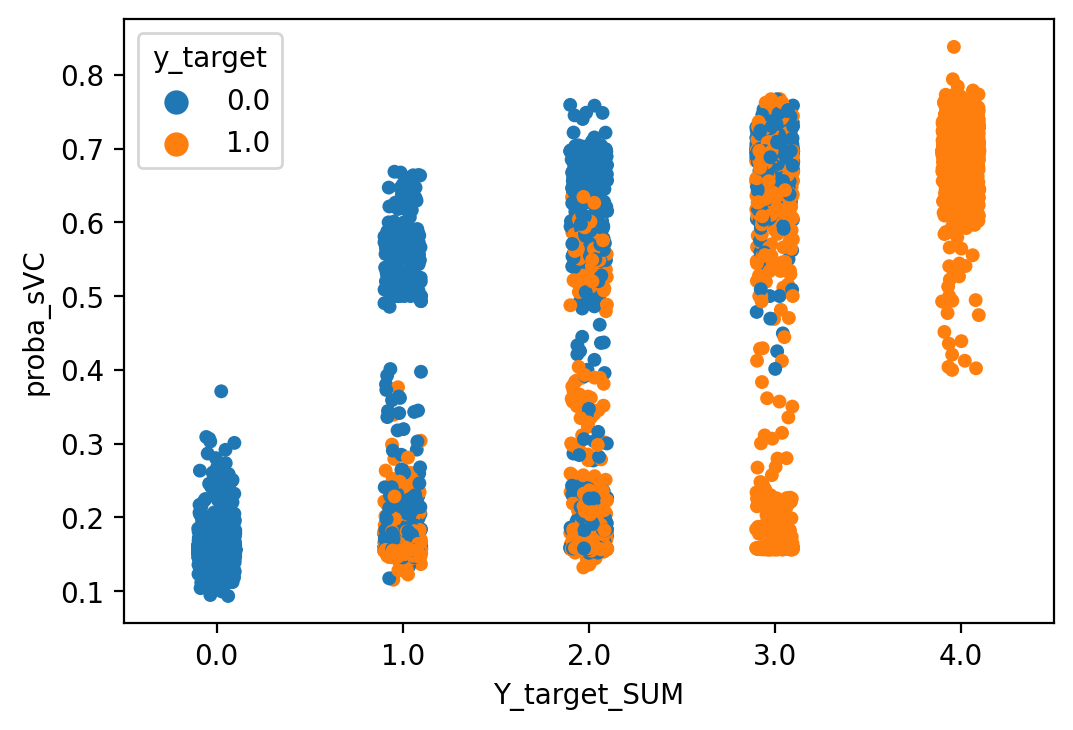

In [112]:
sns.stripplot(x='Y_target_SUM', y='proba_sVC', hue='y_target', data=dff, jitter=True)

<Figure size 1200x1200 with 0 Axes>

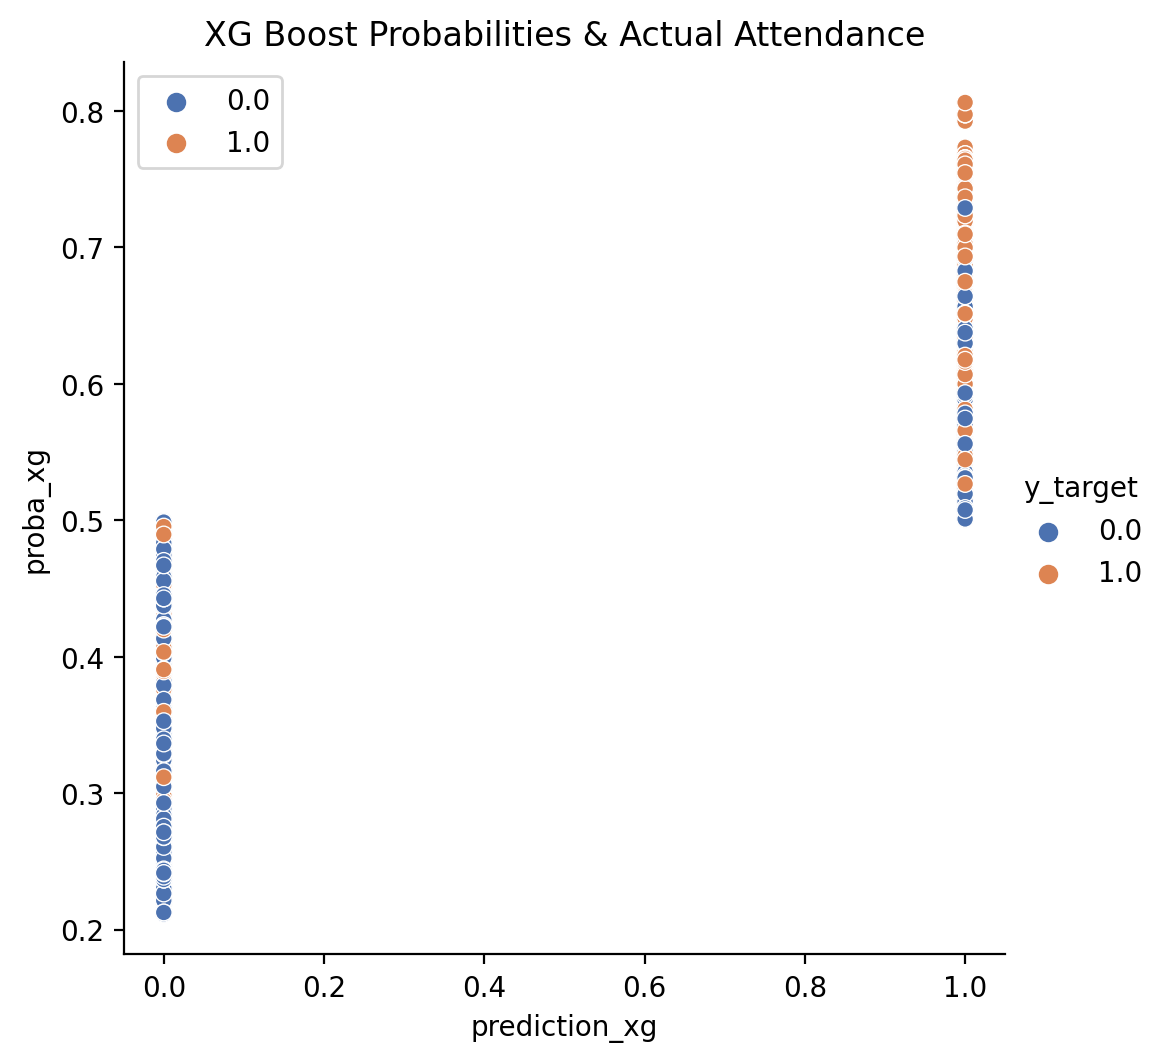

<Figure size 1200x1200 with 0 Axes>

In [101]:

g1 = sns.relplot(data=dff, x='prediction_xg', y ='proba_xg' ,hue= 'y_target', palette="deep" )
# g2 = sns.relplot(data=dff, x='prediction_kNN', y ='proba_kNN' ,hue= 'y_target', palette="deep" )
# g3 = sns.relplot(data=dff, x='prediction_xg', y ='proba_xg' ,hue= 'y_target', palette="deep" )
plt.legend(loc='best')
plt.title('XG Boost Probabilities & Actual Attendance')
plt.figure(figsize=(6, 6))
#make a 4 plot of these to put into readme

In [110]:
# sns.relplot(data=dff,x=['prediction_sVC','prediction_xg' ], y = ['proba_sVC', 'proba_xg'], hue="y_target")


In [ ]:
'''
Need to append IDs to k2,s2
create new col from ids.values

*new idea, create a series of functions to
make a new dataframe.

-rename cols to reflect model type:
knn_proba, knn_prediction , sv_ , xg_

-want to know:
similar among 3
difference among 3

-visualize the above ? compare heatmaps 

assign network or cluster based on Location
or break the graph below into location

assign colors:
overlap - incorrect White/Black
overlap - correct
partial1 ab : Green: light = False, Dark = True
partial2 bc : Blue : light = False, Dark = True
partial3 ac : Yellow: light = False, Dark = True

lambda functions, mapping, 

Want to know if correct-
want to know who it was correct-

'''

In [ ]:
#Update 4/27 Outline for compare_model.py functions 

'''
def change_cols(xg,knn,svc): 
    cols_to_change=[prediction, Proba]
    return df 
    
def combine(xg,knn,svc):
    add the two to one <4/27 migth indiacte to add 
                       < either of those 2 and then add the 2_single set to the One
    
def edit(new_df):
    could do a sum across rows for y_predict value ,0,1,2,3
    if its a 2 then check for ac,ab,bc
    if its a 1 then check for a,b,c 
    assign letter or number based on 1-6
    
def graph(new_df):
    

'''

In [17]:
k = k2['prediction'].values
s = s2['prediction'].values
lst = list(zip(k,s))
lstK = list(zip(k,noid))
lstS = list(zip(noid,s))

In [20]:
acum_s_k=0
acum_b_k=0
acum_b_s=0

for i in lst:
    if i[0] == i[1]:
        acum_s_k+=1
print(acum_s_k)

for i in lstK:
    if i[0] == i[1]:
        acum_b_k+=1
print(acum_b_k)

for i in lstS:
    if i[0] == i[1]:
        acum_b_s+=1
print(acum_b_s)


13469
11969
11962


In [3]:
#sns.stripplot(x='Prediction_Score2', y='proba_k2', hue='y_target', data=dff, jitter=True)
from preprocessing import *

In [4]:
'''
Scale the data
remove target, set to =y
Trying with first part of thomps samp2
'''

'\nScale the data\nremove target, set to =y\nTrying with first part of thomps samp2\n'

In [5]:
a2 = scale(a)
print(a2.head())

   Unnamed: 0  Health_Camp_ID      Var1      Var2      Var3      Var4  \
0           3            6580 -0.108003 -0.073341 -0.016865 -0.116069   
1          12            6580  3.762503  0.862919 -0.016865 -0.116069   
2          30            6580 -0.108003 -0.073341 -0.016865 -0.116069   
3          50            6580  1.504708  0.160724 -0.016865 -0.116069   
4          64            6580 -0.108003 -0.073341 -0.016865 -0.116069   

       Var5  y_target  Camp Length  BFSI  Broadcasting  Consulting  Education  \
0 -0.225540       0.0          0.0     0             0           0          0   
1  5.062624       0.0          0.0     0             0           0          0   
2 -0.225540       0.0          0.0     0             0           0          0   
3  5.062624       0.0          0.0     0             0           0          0   
4 -0.225540       0.0          0.0     0             0           0          0   

   Food  Health  Manufacturing  Others  Real Estate  Retail  \
0     0    

In [6]:
a_ = a.drop(['Unnamed: 0', 'Health_Camp_ID','SVC', 'svc_preds', 'XG','xg_preds', 'log', 'log_preds', 'Patient_ID'], axis = 1)
print(a_.columns) 
y_target = a_['y_target']

Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'y_target', 'Camp Length',
       'BFSI', 'Broadcasting', 'Consulting', 'Education', 'Food', 'Health',
       'Manufacturing', 'Others', 'Real Estate', 'Retail', 'Software Industry',
       'Technology', 'Telecom', 'Transport', 'A', 'C', 'D', 'E', 'F', 'G',
       'Second', 'Third', '1', '2', '3', '4',
       'Camp Start Date - Registration Date',
       'Registration Date - First Interaction',
       'Camp Start Date - First Interaction',
       'Camp End Date - Registration Date'],
      dtype='object')


In [8]:
from sklearn.cluster import KMeans

In [29]:
ncluster_list = range(1,18)

def kmean_score(nclust):
    
    km = KMeans(n_clusters = nclust, 
                init = 'random', 
                n_init = 10, 
                max_iter = 300) 
                #n_jobs = -1) #look at hyperparameters 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
    km.fit(a_)
    rss = -km.score(a_)
    return rss

scores = [kmean_score(i) for i in range(1,18)]
print("#clust\trss")
for i, score in enumerate(scores):
    print("{0}\t{1:0.0f}".format(ncluster_list[i],score))

#clust	rss
1	33032
2	26955
3	19657
4	14455
5	9899
6	8575
7	8026
8	7828
9	7555
10	7641
11	4451
12	4405
13	7486
14	7226
15	4212
16	3875
17	3415
18	4075
19	6898


[[ 1  2]
 [ 1  4]
 [ 1  0]
 [10  2]
 [10  4]
 [10  0]]


In [43]:
r = np.zeros(50)

In [46]:
lst=[1 for x,xx in enumerate(r) if x%2 == 0 ]

In [5]:
df3 = dff.head()

In [7]:
df3.to_csv('/home/allen/Galva/capstones/capstone2/data/models_for_git_head.csv')

In [7]:
surprising3= dff[dff['y_target']==1 & (dff['Y_count_allModels']==0)]
# Where the Person went to a Camp BUT no model predicted they would
print(len(surprising3))

surprising3a= dff[dff['y_target']==1 & (dff['Y_count_allModels']!=0)]
# Where the Person went to a Camp and some model predicted they would
print(len(surprising3a))

3101
11955


In [8]:
surprising2= dff[(dff['y_target']==0) & (dff['Y_count_allModels']>=2)]
# Where the person did Not go to a Camp But two models thought they would
print(len(surprising2))

1051


In [9]:
dff.columns

import itertools as it 

lst = [item for item in dff.columns]
print(lst)

['Unnamed: 0', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Camp Start Date - Registration Date', 'Registration Date - First Interaction', 'Camp Start Date - First Interaction', 'Camp End Date - Registration Date', 'Camp Length', 'Second', 'Third', 'A', 'C', 'D', 'E', 'F', 'G', '2100', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '11.0', '12.0', '13.0', '14.0', '9999.0', '1', '2', '3', '4', '1036', '1216', '1217', '1352', '1704', '1729', '2517', '2662', '23384', 'Patient_ID', 'prediction', 'Proba', 'y_target', 'proba_kNN', 'prediction_kNN', 'proba_sVC', 'prediction_sVC', 'proba_xg', 'prediction_xg', 'Y_count_allModels', 'Y_target_SUM', 'Success']


In [10]:
 #  itertools.combinations(iterable, r)
itered = it.combinations(lst[1:9] , 6)    

In [62]:
import math
from math import factorial

print(math.factorial(6) / (math.factorial(9)-math.factorial(6) )  ) 

0.0019880715705765406


# surprising

In [41]:
'''
Ho Testing for certain columns to test if significant differences exist among 

sec_ho = dff[dff['y_target'] ==1 ]['Second'].to_numpy()
sec_ha = dff[dff['y_target'] ==0 ]['Second'].to_numpy()

sec_ho_mean = sec_ho.mean()
sec_ha_mean = sec_ha.mean()

ztest(sec_ho_mean,sec_ha_mean)

surprising3= dff[dff['y_target']==1 & (dff['Y_count_allModels']==0)]
# Where the Person went to a Camp BUT no model predicted they would
print(len(surprising3))

surprising3a= dff[dff['y_target']==1 & (dff['Y_count_allModels']!=0)]
# Where the Person went to a Camp and some model predicted they would
print(len(surprising3a))
'''

"\nHo Testing for certain columns to test if significant differences exist\n\nsec_ho = dff[dff['y_target'] ==1 ]['Second'].to_numpy()\nsec_ha = dff[dff['y_target'] ==0 ]['Second'].to_numpy()\n\nsec_ho_mean = sec_ho.mean()\nsec_ha_mean = sec_ha.mean()\n\nztest(sec_ho_mean,sec_ha_mean)\n"

In [11]:
import scipy.stats as stats
def ho_testing(ho,ha):
    '''
    Inputs: x= list of lists   
    output: a p_value 
    ''' 
    
    return stats.ttest_ind(ho,ha,alternative= "two-sided",equal_var =False)

In [20]:
def manual_ho_testing(ho,ha):
    stan_error = sum(ho) - sum(ha)
    pp = (stan_error)/(len(ho)+len(ha)) #pool_proba
    pool_stan_error = (pp * (1-pp) * (1/( len(ho) +len(ha))**.5 ) )
    return f'stand error -> {round(stan_error,2)} , pooled_proba ->{round(pp,2)}, and pool_error {round(pool_stan_error,2)}'


In [16]:
cols2 = [
    'Var1', 'Var2', 'Var3', 'Var4', 'Var5',
       'Camp Start Date - Registration Date',
       'Registration Date - First Interaction',
       'Camp Start Date - First Interaction', 'Success',
       'Camp End Date - Registration Date', 'Camp Length', 'Second', 'Third',
       'A', 'C', 'D', 'E', 'F', 'G', '2100', '2.0', '3.0', '4.0', '5.0', '6.0',
       '7.0', '8.0', '9.0', '10.0', '11.0', '12.0', '13.0', '14.0', '9999.0',
       '1', '2', '3', '4', '1036', '1216', '1217', '1352', '1704', '1729',
       '2517', '2662'
]

In [21]:
cols=['Second','Third','9999.0', 'Camp Length']
check = []
for i in cols2:
    ho = surprising3a[i].values
    ha = surprising3[i].values
    get = ho_testing(ho,ha) 
    
    get1 = round(get[0],3)
    get2 = round(get[1],3)
    print(f'statistic = {get1} p_val --> {get2}, for COI --> {i}',manual_ho_testing(ho,ha) )
    

statistic = -2.755 p_val --> 0.006, for COI --> Var1 stand error -> 4757.0 , pooled_proba ->0.32, and pool_error 0.0
statistic = -0.815 p_val --> 0.415, for COI --> Var2 stand error -> 1781.0 , pooled_proba ->0.12, and pool_error 0.0
statistic = 2.0 p_val --> 0.045, for COI --> Var3 stand error -> 4.0 , pooled_proba ->0.0, and pool_error 0.0
statistic = -2.992 p_val --> 0.003, for COI --> Var4 stand error -> 127.0 , pooled_proba ->0.01, and pool_error 0.0
statistic = -5.563 p_val --> 0.0, for COI --> Var5 stand error -> 1453.0 , pooled_proba ->0.1, and pool_error 0.0
statistic = -3.721 p_val --> 0.0, for COI --> Camp Start Date - Registration Date stand error -> -506471.0 , pooled_proba ->-33.64, and pool_error -9.5
statistic = -6.598 p_val --> 0.0, for COI --> Registration Date - First Interaction stand error -> 1336827 , pooled_proba ->88.79, and pool_error -63.53
statistic = -11.53 p_val --> 0.0, for COI --> Camp Start Date - First Interaction stand error -> 830356 , pooled_proba ->

In [32]:
surprising3.head()

,Unnamed: 0,Var1,Var2,Var3,Var4,Var5,Camp Start Date - Registration Date,Registration Date - First Interaction,Camp Start Date - First Interaction,Camp End Date - Registration Date,Camp Length,Second,Third,A,C,D,E,F,G,2100,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,9999.0,1,2,3,4,1036,1216,1217,1352,1704,1729,2517,2662,23384,Patient_ID,prediction,Proba,y_target,proba_kNN,prediction_kNN,proba_sVC,prediction_sVC,proba_xg,prediction_xg,Y_count_allModels,Y_target_SUM,Success
4,4,0.0,0.0,0.0,0.0,0.0,19.0,11,30,58,39,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,520795,1.0,0.516371,0.0,0.4,0.0,0.565486,1.0,0.476005,0.0,1.0,1.0,1.0
7,7,0.0,0.0,0.0,0.0,0.0,42.0,391,433,100,58,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,519647,1.0,0.503043,0.0,0.5,0.0,0.639841,1.0,0.501662,1.0,2.0,2.0,2.0
10,10,0.0,0.0,0.0,0.0,0.0,-14.0,508,494,171,185,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511518,0.0,0.429973,1.0,0.0,0.0,0.154641,0.0,0.411437,0.0,0.0,1.0,1.0
18,18,0.0,0.0,0.0,0.0,0.0,-34.0,18,-16,151,185,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,516873,0.0,0.363606,1.0,0.5,0.0,0.156653,0.0,0.361426,0.0,0.0,1.0,1.0
25,25,0.0,0.0,0.0,0.0,0.0,-2.0,281,279,3,5,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,525713,1.0,0.639823,0.0,0.3,0.0,0.198662,0.0,0.594023,1.0,1.0,1.0,1.0


In [33]:
surprising3.columns

Index(['Unnamed: 0', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5',
       'Camp Start Date - Registration Date',
       'Registration Date - First Interaction',
       'Camp Start Date - First Interaction',
       'Camp End Date - Registration Date', 'Camp Length', 'Second', 'Third',
       'A', 'C', 'D', 'E', 'F', 'G', '2100', '2.0', '3.0', '4.0', '5.0', '6.0',
       '7.0', '8.0', '9.0', '10.0', '11.0', '12.0', '13.0', '14.0', '9999.0',
       '1', '2', '3', '4', '1036', '1216', '1217', '1352', '1704', '1729',
       '2517', '2662', '23384', 'Patient_ID', 'prediction', 'Proba',
       'y_target', 'proba_kNN', 'prediction_kNN', 'proba_sVC',
       'prediction_sVC', 'proba_xg', 'prediction_xg', 'Y_count_allModels',
       'Y_target_SUM', 'Success'],
      dtype='object')

In [ ]:
Prediction = # I think is XG 1 prediction
Prediction_Score = # see above
Y_target_SUM = #up to 4
Y_count_allModels = # pred from xg+knn+svc up to 3

# Wanting Y count among all models
# sum (Y Target , all models)
#

In [ ]:
'''
smaller:
[('Second', (0.0005101027299358867, 0.5002035015374943)), ('Third', (0.001746215432479473, 0.5006966388126657)), 
('9999.0', (0.00036383681552966033, 0.5001451498856789)), ('Camp Length', (0.0008299770004436161, 0.5003311128792225))]


'''

In [17]:
#surprising3['Pred_Score_all_models'].max()
sup3 = surprising3[['y_target', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5',
       'Camp Start Date - Registration Date',
       'Registration Date - First Interaction',
       'Camp Start Date - First Interaction']]

In [19]:
sns.heatmap(sup3, annot='True')

ValueError: `data` and `annot` must have same shape.

In [32]:
se =  0.23 -0.11 
pp_ =  0.012 / 2000 
pse =  pp_*(1-pp_) * (1/1000 + 1/1000)**.5  
print(se,pp_,pse)

0.12000000000000001 6e-06 2.68326547331031e-07


In [29]:
0.012/0.00578 

2.0761245674740483